In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt
import os

In [2]:
#Directory of experiment file
mydir = './'
filename = '2020-02-06_lib quantify.xlsx'

In [6]:
Excel = pd.read_excel(mydir + filename)
Excel.head()

,Block Type,96-Well 0.2-mL Block,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Calibration Background is expired,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Calibration Background performed on,10-11-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Calibration Pure Dye ABY is expired,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Calibration Pure Dye ABY performed on,10-11-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Calibration Pure Dye CY5 is expired,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#clean excel
new_header = Excel.loc[46]
data = Excel.iloc[47:, :]
data.columns = new_header
#Get subsets of data
Results = data[["Sample Name", "Task", "CT"]]
#Rename the column names to get rid of "blank"
Results_header = ["Sample", "Task", "CT"]
Results.columns = Results_header
Results

,Sample,Task,CT
47,100pM,STANDARD,7.00972
48,10pM,STANDARD,9.4393
49,1pM,STANDARD,13.6171
50,0.1pM,STANDARD,16.6609
51,R1_j,UNKNOWN,20.6286
52,R1_F1,UNKNOWN,18.9468
53,R1_F2,UNKNOWN,17.559
54,R1_F3,UNKNOWN,19.3082
55,100pM,STANDARD,6.78211
56,10pM,STANDARD,9.0495


In [8]:
#clean up data by NTC, CT bigger than NTC is considered untrustworthy
Results2 = Results.sort_values("CT")
Results2.reset_index(drop=True)

,Sample,Task,CT
0,100pM,STANDARD,6.78211
1,100pM,STANDARD,7.00972
2,10pM,STANDARD,9.0495
3,10pM,STANDARD,9.4393
4,1pM,STANDARD,13.6171
5,1pM,STANDARD,14.5111
6,0.1pM,STANDARD,16.6609
7,R1_F2,UNKNOWN,17.1916
8,R1_F2,UNKNOWN,17.559
9,R1_F1,UNKNOWN,17.9493


In [9]:
# get the upper and lower limit for valuable samples
index1 = input("starting index number, such as type 0 to get the first line. ")
index2 = input("ending index number such as type 16 to get the 16th line, indexed as 15. ")

starting index number, such as type 0 to get the first line. 0
ending index number such as type 16 to get the 16th line, indexed as 15. 16


In [11]:
a = int(index1)
b = int(index2)
Result = Results2.iloc[a:b, :]
Result

,Sample,Task,CT
55,100pM,STANDARD,6.78211
47,100pM,STANDARD,7.00972
56,10pM,STANDARD,9.0495
48,10pM,STANDARD,9.4393
49,1pM,STANDARD,13.6171
57,1pM,STANDARD,14.5111
50,0.1pM,STANDARD,16.6609
61,R1_F2,UNKNOWN,17.1916
53,R1_F2,UNKNOWN,17.559
60,R1_F1,UNKNOWN,17.9493


In [9]:
#Generate standard curve，need to convert datatype into float for math function
Standards = Result.loc[Result["Task"] == 'STANDARD'].copy()
Standards["conc"] = Standards.Sample.apply(lambda x:  x[0:-2])
Standards.conc = Standards.conc.astype("float")
Standards["log10_conc"] = Standards.conc.apply(lambda x: np.log10(x))
Standards.CT = Standards.CT.astype("float")
Standards

,Sample,Task,CT,conc,log10_conc
55,100pM,STANDARD,6.782110,100.0,2.0
47,100pM,STANDARD,7.009716,100.0,2.0
56,10pM,STANDARD,9.049503,10.0,1.0
48,10pM,STANDARD,9.439298,10.0,1.0
49,1pM,STANDARD,13.617065,1.0,0.0
57,1pM,STANDARD,14.511141,1.0,0.0
50,0.1pM,STANDARD,16.660885,0.1,-1.0
58,0.1pM,STANDARD,18.032125,0.1,-1.0


In [8]:
#Generate standard curve，need to convert datatype into float for math function
Standards = Result.loc[Result["Task"] == 'STANDARD'].copy()
Standards.loc[:,"conc"] = Standards.Sample.apply(lambda x:  x[0:-2])
Standards.conc = Standards.conc.astype("float")
Standards.loc[:,"log10_conc"] = Standards.conc.apply(lambda x: np.log10(x))
Standards.CT = Standards.CT.astype("float")
Standards

,Sample,Task,CT,conc,log10_conc
55,100pM,STANDARD,6.782110,100.0,2.0
47,100pM,STANDARD,7.009716,100.0,2.0
56,10pM,STANDARD,9.049503,10.0,1.0
48,10pM,STANDARD,9.439298,10.0,1.0
49,1pM,STANDARD,13.617065,1.0,0.0
57,1pM,STANDARD,14.511141,1.0,0.0
50,0.1pM,STANDARD,16.660885,0.1,-1.0
58,0.1pM,STANDARD,18.032125,0.1,-1.0


In [16]:
#use linear regression function from scipy package 
slope, intercept, r_value, p_value, std_err = stats.linregress(Standards.log10_conc, Standards.CT)
print("slope:%f intercept:%f p_value: %f std_err:%f " % (slope, intercept, p_value, std_err))
k = slope
b = intercept
std = std_err

slope:-3.617148 intercept:13.696304 p_value: 0.000006 std_err:0.240992 


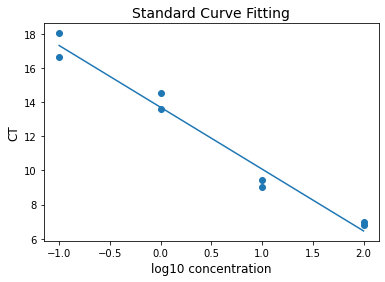

In [17]:
#plot standard curve
plt.scatter(Standards.log10_conc, Standards.CT)
plt.plot(Standards.log10_conc, (k*Standards.log10_conc+b));

#Add axis labels
plt.xlabel('log10 concentration', fontsize=12);
plt.ylabel('CT',fontsize=12);

#Add a title
plt.title('Standard Curve Fitting',fontsize=14);

In [18]:
#Get the probe concentration of UNKNOWN data
unknown = Result.loc[Result["Task"] == 'UNKNOWN'].copy()
unknown['conc'] = unknown.CT.apply(lambda x: pow(10, (x-b)/k) )
unknown

,Sample,Task,CT,conc
61,R1_F2,UNKNOWN,17.1916,0.108067
53,R1_F2,UNKNOWN,17.559,0.085532
60,R1_F1,UNKNOWN,17.9493,0.066714
52,R1_F1,UNKNOWN,18.9468,0.035354
62,R1_F3,UNKNOWN,19.2056,0.029983
54,R1_F3,UNKNOWN,19.3082,0.028088
59,R1_j,UNKNOWN,20.2958,0.014980
51,R1_j,UNKNOWN,20.6286,0.012120


In [19]:
#Gnerate new dataframe for statistic analysis and plotting
Mean = unknown.groupby("Sample").mean()
STD = unknown.groupby("Sample").std()
Analyzed = pd.merge(Mean, STD, on= "Sample", suffixes=('_mean', '_std'))
Analyzed.reset_index(level=None, drop=False, inplace=True)
Analyzed

,Sample,conc_mean,conc_std
0,R1_F1,0.051034,0.022175
1,R1_F2,0.096800,0.015935
2,R1_F3,0.029036,0.001340
3,R1_j,0.013550,0.002022


Text(0.5, 1.0, 'Exp_2020-02-06_lib quantify')

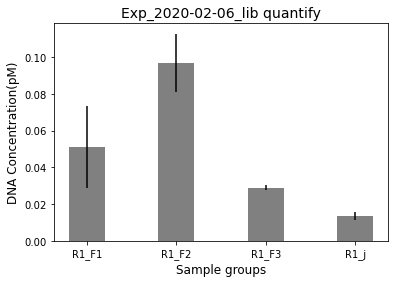

In [20]:
#set plot figure format
fig = plt.figure()
plt.bar(Analyzed.Sample, Analyzed.conc_mean, width=0.4, yerr=Analyzed.conc_std, color='grey')
plt.xlabel("Sample groups", fontsize=12, color = "black")
plt.ylabel("DNA Concentration(pM)", fontsize=12, color = "black")
plt.title("Exp_2020-02-06_lib quantify", fontsize=14)

In [15]:
#save output files
figname = "output_" + os.path.splitext(filename)[0]
dataname = "output_" + filename
fig.savefig(figname)
Analyzed.to_excel(dataname)